In [2]:
import pandas as pd
import kagglehub
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             precision_recall_curve, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
import pathlib

In [6]:
# Read dataset
path = pathlib.Path("dataset/one_million_mushrooms.csv")
df = pd.read_csv(path, delimiter=';')

# Detalles del dataset

| Columna               | Tipo    | Descripción general                                                                              | Valores posibles                                                                                                                                            |
|------------------------|---------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| class                  | categ. | Clase del hongo según su toxicidad                                                                | e = comestible, p = venenoso                                                                                                                                |
| cap-diameter (cm)      | num.   | Diámetro del sombrero (píleo)                                                                      | número flotante en cm                                                                                                                                       |
| cap-shape              | categ. | Forma del sombrero                                                                                | b = campana, c = cónica, x = convexa, f = plana, s = hundida, p = esférica, o = otras                                                                        |
| cap-surface            | categ. | Textura de la superficie del sombrero                                                             | i = fibrosa, g = con surcos, y = escamosa, s = lisa, h = brillante, l = coriácea, k = sedosa, t = pegajosa, w = arrugada, e = carnosa                        |
| cap-color              | categ. | Color del sombrero                                                                               | n = marrón, b = beige, g = gris, r = verde, p = rosa, u = púrpura, e = rojo, w = blanco, y = amarillo, l = azul, o = naranja, k = negro                        |
| does-bruise-bleed      | categ. | Indica si presenta moretones o sangrado al cortarse                                              | t = sí, f = no                                                                                                                                              |
| gill-attachment        | categ. | Forma en que las laminillas se unen al tallo                                                     | a = adnada, x = adnexada, d = decurrente, e = libre, s = sinuada, p = poros, f = ninguna, ? = desconocido                                                   |
| gill-spacing           | categ. | Separación entre las laminillas                                                                 | c = cerrada, d = distante, f = ninguna                                                                                                                     |
| gill-color             | categ. | Color de las laminillas                                                                          | igual a cap-color + f = ninguna                                                                                                                            |
| stem-height (cm)       | num.   | Altura del tallo                                                                                | número flotante en cm                                                                                                                                       |
| stem-width (mm)        | num.   | Grosor del tallo                                                                                | número flotante en mm                                                                                                                                       |
| stem-root              | categ. | Forma de la base del tallo                                                                      | b = bulbosa, s = hinchada, c = en maza, u = copa, e = igual, z = rizomorfa, r = enraizada                                                                   |
| stem-surface           | categ. | Textura de la superficie del tallo                                                              | igual a cap-surface + f = ninguna                                                                                                                          |
| stem-color             | categ. | Color del tallo                                                                                | igual a cap-color + f = ninguno                                                                                                                            |
| veil-type              | categ. | Tipo de velo                                                                                   | p = parcial, u = universal                                                                                                                                  |
| veil-color             | categ. | Color del velo                                                                                 | igual a cap-color + f = ninguno                                                                                                                            |
| has-ring               | categ. | Indica si el tallo tiene anillo                                                                | t = sí, f = no                                                                                                                                              |
| ring-type              | categ. | Tipo de anillo                                                                                 | c = telaraña, e = evanescente, r = abierto, g = surcado, l = grande, p = colgante, s = envolvente, z = zona, y = escamoso, m = móvil, f = ninguno, ? = desconocido |
| spore-print-color      | categ. | Color de la impresión de esporas                                                                | igual a cap-color                                                                                                                                          |
| habitat                | categ. | Hábitat donde crece                                                                            | g = pastos, l = hojas, m = praderas, p = senderos, h = brezales, u = urbano, w = desechos, d = bosques                                                      |
| season                 | categ. | Estación en que aparece                                                                        | s = primavera, u = verano, a = otoño, w = invierno                                                                                                          |


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

In [13]:
# Ajustar nombre de columnas
df.columns = df.columns.str.replace('-', '_')

### Analisis y tratamiento de faltantes

In [21]:
# Buscar "?" como valores faltantes
(df == "?").any()

 # Reemplazar ? por NaN (comentado por ahora porque no hay)
# df = df.replace('?', np.nan)

class                   False
cap_diameter            False
cap_shape               False
cap_surface             False
cap_color               False
does_bruise_or_bleed    False
gill_attachment         False
gill_spacing            False
gill_color              False
stem_height             False
stem_width              False
stem_root               False
stem_surface            False
stem_color              False
veil_type               False
veil_color              False
has_ring                False
ring_type               False
spore_print_color       False
habitat                 False
season                  False
dtype: bool

In [12]:
df.isnull().sum()

class                        0
cap_diameter                 0
cap_shape                    0
cap_surface             240000
cap_color                    0
does_bruise_or_bleed         0
gill_attachment         168000
gill_spacing            426000
gill_color                   0
stem_height                  0
stem_width                   0
stem_root               876000
stem_surface            648000
stem_color                   0
veil_type               984000
veil_color              912000
has_ring                     0
ring_type                42000
spore_print_color       930000
habitat                      0
season                       0
dtype: int64

<Axes: >

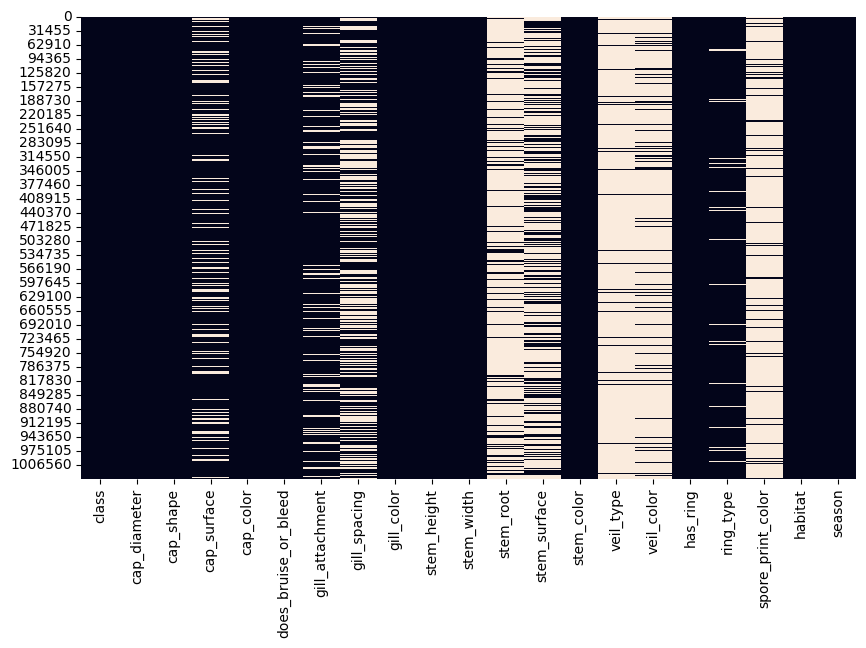

In [15]:
# Plot nulls heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)

In [6]:
#Balance de clases
df['class'].value_counts(normalize=True)

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64

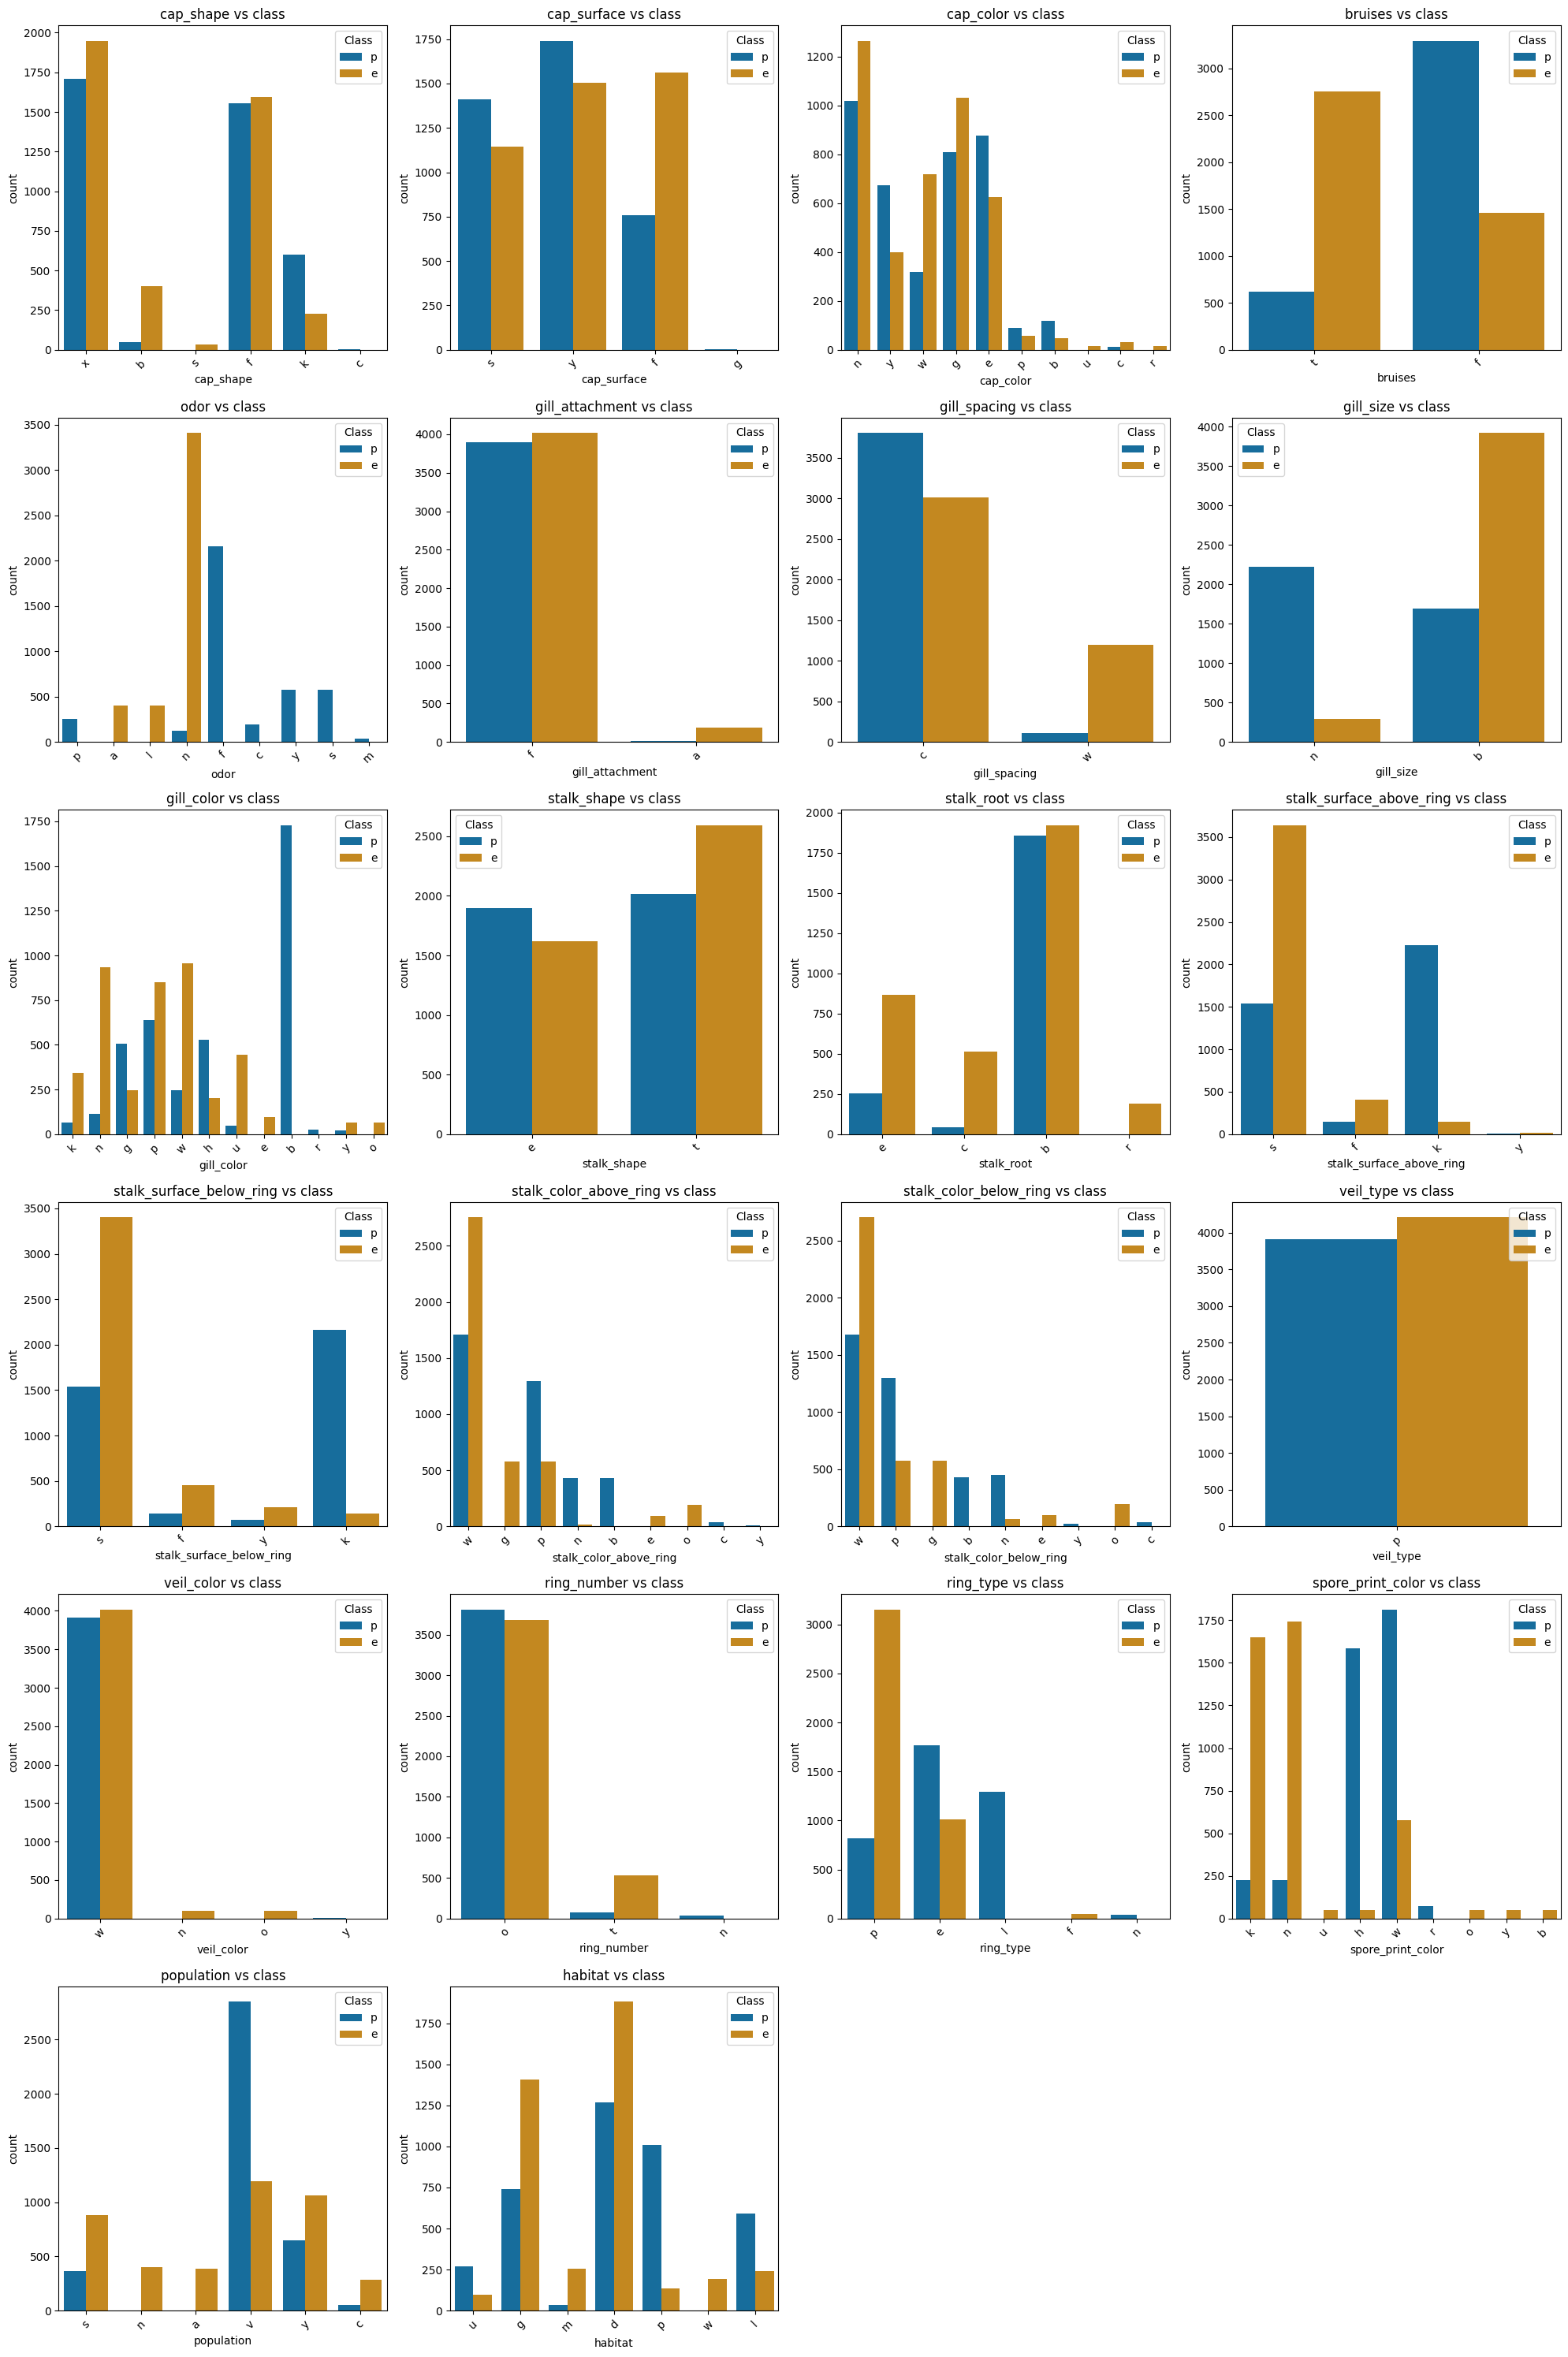

In [7]:
#Buscamos a simple vista features que separan las clases o que no aportan informacion.
#Se encuentran 3 features que separan las clases completamente: odor, gill_color, spore_print_color
#Tambien se observa que veil_type tiene un solo valor, por lo que no aporta informacion
feature_cols = [col for col in df.columns if col != 'class']
n_cols = 4  
n_rows = (len(feature_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.countplot(x=col, data=df, hue='class', palette='colorblind', ax=axes[i])
    axes[i].set_title(f'{col} vs class')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Class')

# Ocultar subplots vacíos si los hay
for j in range(len(feature_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
#Mediante la funcion de Cramér's V se calcula la correlacion entre variables categoricas
def cramers_v(x, y):
    # Eliminar valores NaN para el cálculo
    mask = ~(pd.isna(x) | pd.isna(y))
    x_clean = x[mask]
    y_clean = y[mask]
    
    # Si alguna variable tiene una sola categoría, la correlación es 0
    if len(x_clean.unique()) <= 1 or len(y_clean.unique()) <= 1:
        return 0.0
    
    confusion_matrix = pd.crosstab(x_clean, y_clean)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    
    # Si n es muy pequeño, retornar 0
    if n <= 1:
        return 0.0
        
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # Evitar división por cero para que no de warning
    denominator = min((kcorr-1), (rcorr-1))
    if denominator <= 0:
        return 0.0
    
    return np.sqrt(phi2corr / denominator)

# Calcular matriz de correlación categórica
cols = [c for c in df.columns if c != 'class']
corr_matrix = pd.DataFrame(index=cols, columns=cols)

for c1 in cols:
    for c2 in cols:
        corr_matrix.loc[c1, c2] = cramers_v(df[c1], df[c2])

corr_matrix = corr_matrix.astype(float)


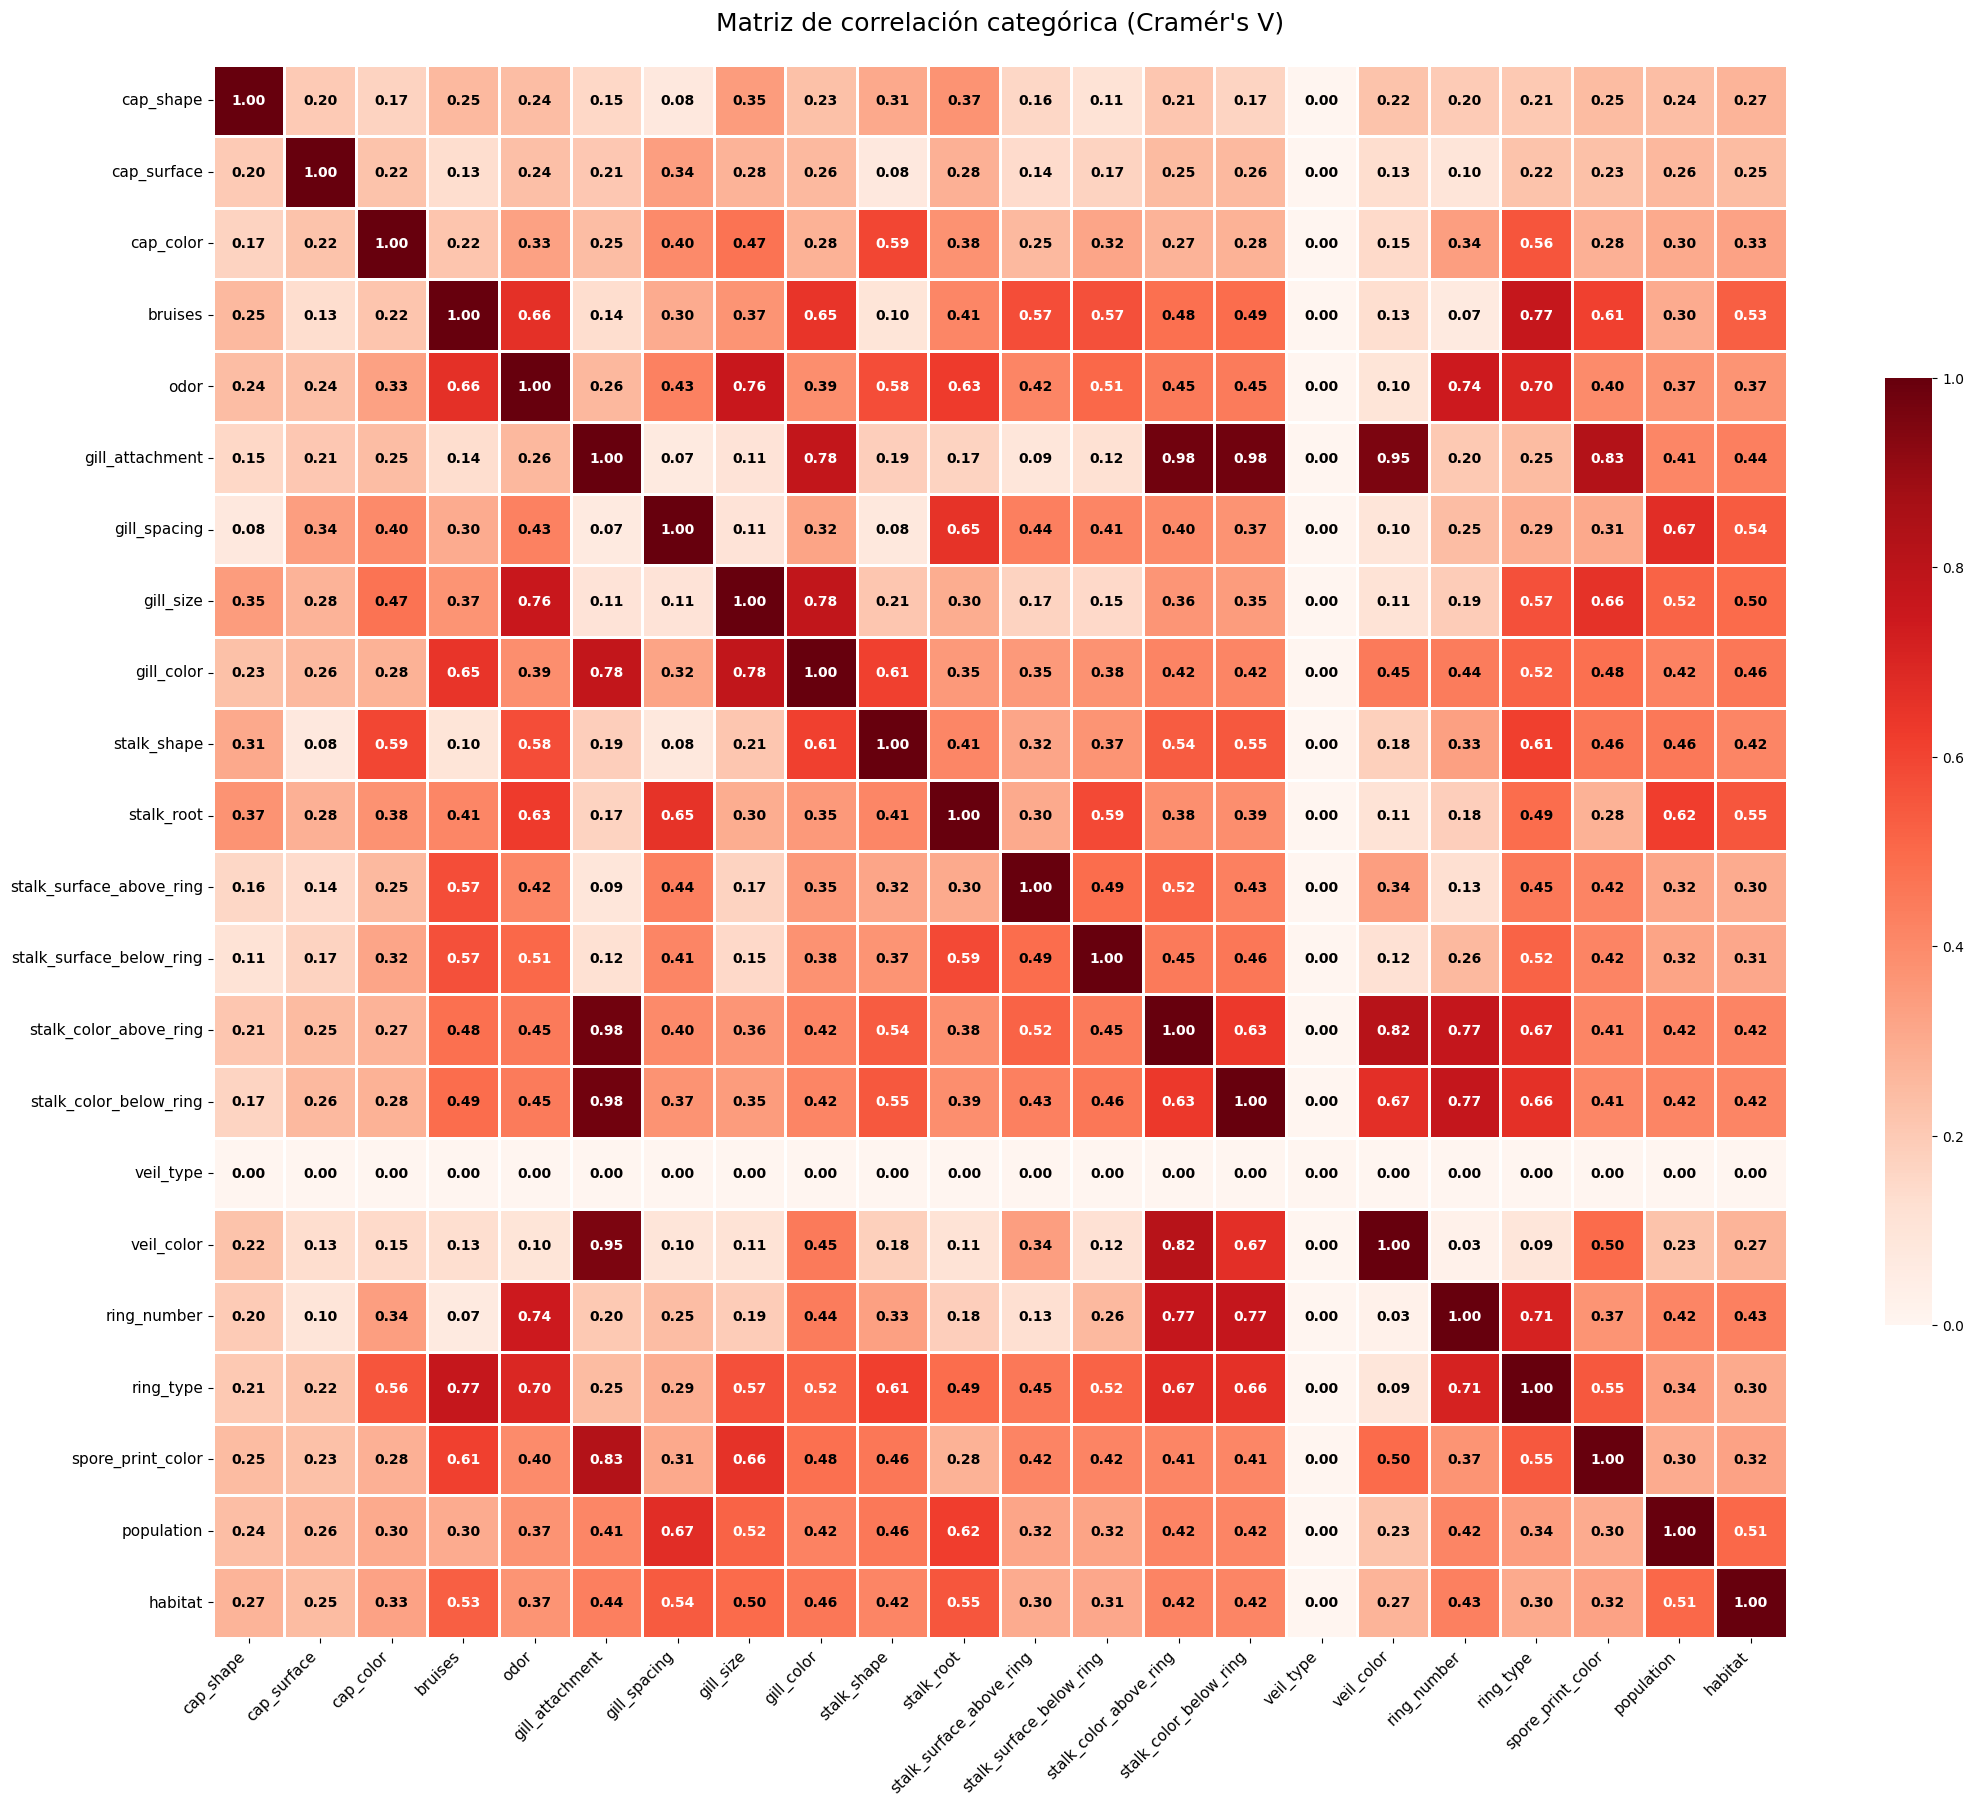

In [9]:
plt.figure(figsize=(22, 18))

ax = sns.heatmap(corr_matrix, 
                 annot=False,         
                 cmap='Reds',
                 square=True,
                 linewidths=0.8,
                 cbar_kws={'shrink': .6})

for i in range(len(corr_matrix.index)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        text_color = 'white' if value > 0.5 else 'black'
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', 
                ha='center', va='center', 
                fontsize=10, color=text_color, weight='bold')

plt.title("Matriz de correlación categórica (Cramér's V)", 
          fontsize=18, pad=25)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

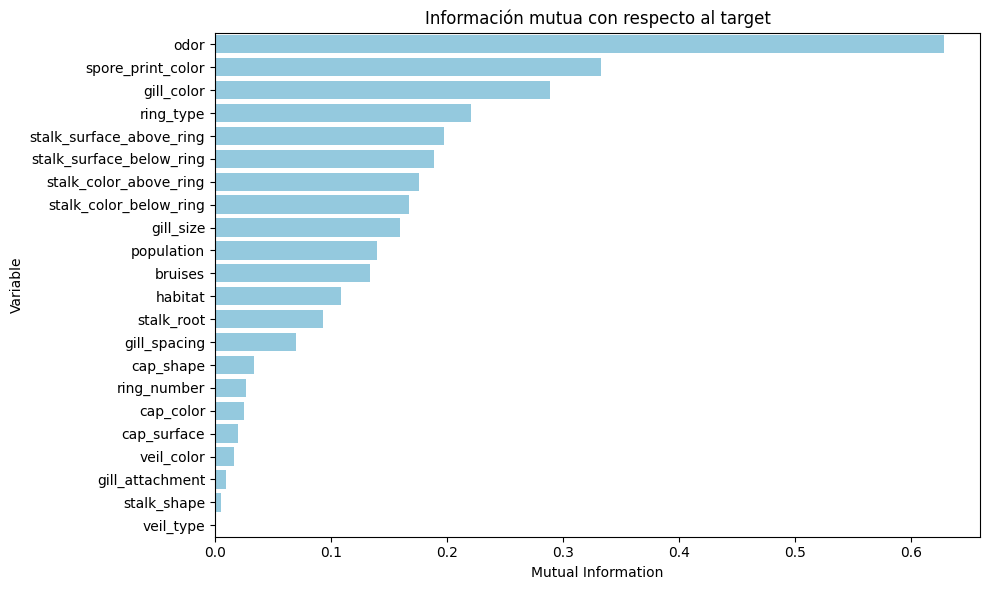

In [10]:
X = df.drop(columns='class')
y = df['class']

# Codificar variables categóricas para obtener información mutua con respecto al target
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, 
                     encoded_missing_value=-2)
X_enc = enc.fit_transform(X)

mutual_info = mutual_info_classif(X_enc, y, discrete_features=True)

mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=mutual_info_series, y=mutual_info_series.index, color='skyblue')
plt.title('Información mutua con respecto al target')
plt.xlabel('Mutual Information')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Generacion primer modelo de prueba

In [11]:
X = df.drop(columns='class')
y = df['class']

# Dividir el dataset en entrenamiento y prueba con estratificación para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1408
)

In [12]:
#Codificación de variables categóricas por one-hot encoding.
#Ventajas: Interpretable, no introduce orden en categorias nominales.
#Desventajas: Aumenta la dimensionalidad del dataset, no maneja bien variables con muchas categorias.

categorical_features = X_train.columns.tolist()

cat_pipeline_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_ohe = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline_ohe, categorical_features)
    ]
)

In [13]:
#Codificación de variables categóricas por target encoding
#Ventajas: No aumenta la dimensionalidad del dataset, maneja variables con muchas categorias
#Desventajas: Puede introducir leakage si no se maneja correctamente, no es interpretable

cat_pipeline_targetencoding = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.TargetEncoder(handle_missing='most_frequent', handle_unknown='value'))
])

preprocessor_te = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline_targetencoding, categorical_features)
    ]
)

In [14]:
#Modelo de regresion logistica con preprocesamiento one-hot encoding
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_ohe),   # o preprocessor_te
    ('classifier', LogisticRegression(max_iter=20))
])

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [15]:
#Estructura de pipelines para comparar modelos. 
pipelines = {
    'OneHot + LogisticRegression': Pipeline([
        ('preprocessor', preprocessor_ohe),
        ('model', LogisticRegression(max_iter=100))
    ]),
    'TargetEnc + LogisticRegression': Pipeline([
        ('preprocessor', preprocessor_te),
        ('model', LogisticRegression(max_iter=100))
    ])
}

In [16]:
#Evaluar modelos con cross-validation
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"{name}: media F1_macro = {scores.mean():.4f} (+/- {scores.std():.4f})")

OneHot + LogisticRegression: media F1_macro = 0.9995 (+/- 0.0009)
TargetEnc + LogisticRegression: media F1_macro = 0.9955 (+/- 0.0012)


### Multiples modelos y comparativa

In [17]:
RANDOM_STATE = 1408
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc_ovr": "roc_auc_ovr"
}

In [18]:
# Crear un preprocessor especial para HistGradientBoostingClassifier que requiere datos densos


# Función para convertir sparse a denso
def sparse_to_dense(X):
    if hasattr(X, 'toarray'):
        return X.toarray()
    return X

# Preprocessor para datos densos (para KNN y SVM)
preprocessor_dense = Pipeline([
    ('preprocessor', preprocessor_ohe),
    ('densify', FunctionTransformer(sparse_to_dense, validate=False))
])

pipelines = {
    "LogReg_OHE": Pipeline([("pre", preprocessor_ohe),
                            ("model", LogisticRegression(max_iter=1000, n_jobs=None, random_state=RANDOM_STATE))]),
    "Tree_OHE": Pipeline([("pre", preprocessor_ohe),
                          ("model", DecisionTreeClassifier(random_state=RANDOM_STATE))]),
    "RF_OHE": Pipeline([("pre", preprocessor_ohe),
                        ("model", RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=RANDOM_STATE))]),
    "KNN_OHE": Pipeline([("pre", preprocessor_dense),  # KNN requiere datos densos
                         ("model", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))]),
    "SVM_OHE": Pipeline([("pre", preprocessor_dense),  # SVM también funciona mejor con datos densos
                         ("model", SVC(kernel='rbf', random_state=RANDOM_STATE, probability=True))])
}

In [19]:
results = []
for name, pipe in pipelines.items():
    cv_res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    results.append({
        "model": name,
        "f1_macro_mean": cv_res["test_f1_macro"].mean(),
        "f1_macro_std":  cv_res["test_f1_macro"].std(),
        "acc_mean":      cv_res["test_accuracy"].mean(),
        "roc_auc_mean":  cv_res["test_roc_auc_ovr"].mean()
    })

cv_table = pd.DataFrame(results).sort_values("f1_macro_mean", ascending=False)
cv_table

,model,f1_macro_mean,f1_macro_std,acc_mean,roc_auc_mean
2,RF_OHE,1.000000,0.000000,1.000000,1.000000
3,KNN_OHE,1.000000,0.000000,1.000000,1.000000
4,SVM_OHE,1.000000,0.000000,1.000000,1.000000
1,Tree_OHE,0.999692,0.000617,0.999692,0.999681
0,LogReg_OHE,0.999538,0.000617,0.999538,1.000000
